## Импорт, преобразование данных и предварительный анализ

In [293]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [278]:
prod = pd.read_csv('data/clay_bricks.csv', index_col=0, parse_dates=True)
prod.columns = ['million_units']

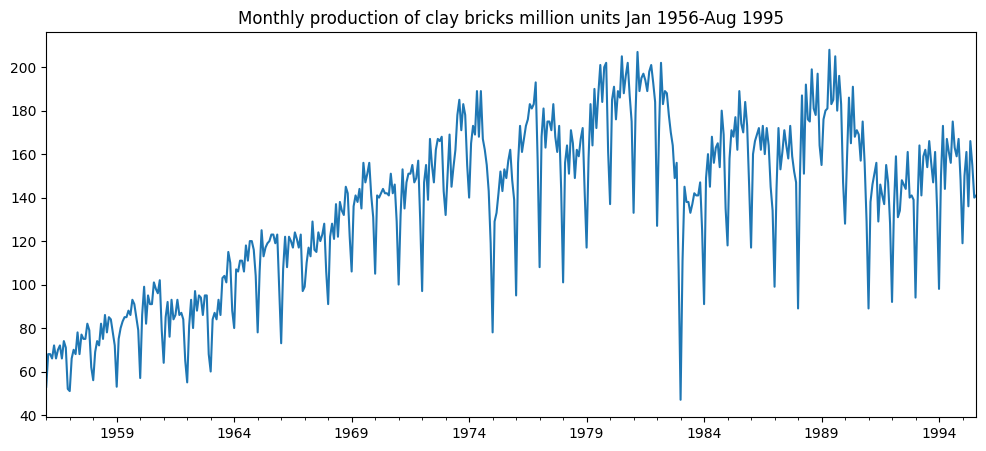

In [279]:
prod['million_units'].plot(figsize=(12,5))
plt.title('Monthly production of clay bricks million units Jan 1956-Aug 1995')
plt.show()

Возьмем значения с 1975 года, т.к. все что было до этого момента - не актуально

In [280]:
prod = prod['1975-01-01'::]

In [281]:
prod.head()

,million_units
1975-01-01,78
1975-02-01,129
1975-03-01,133
1975-04-01,142
1975-05-01,152


## Инициализация и обучение модели Prophet, прогноз

In [282]:
from prophet import Prophet

In [283]:
prod_prophet = prod.reset_index()
prod_prophet.columns = ['ds', 'y']

In [284]:
prod_prophet.head()

,ds,y
0,1975-01-01,78
1,1975-02-01,129
2,1975-03-01,133
3,1975-04-01,142
4,1975-05-01,152


Датасет - производство кирпичей в Соединенных Штатах, для улучшения модели добавим праздники, а также 4-х годовую сезонность

In [285]:
model = Prophet(weekly_seasonality=False, daily_seasonality=False, yearly_seasonality=False)
model.add_seasonality(name='yearly', period=365*4, fourier_order=20)
model.add_country_holidays(country_name='US') 
model.fit(prod_prophet)

23:04:40 - cmdstanpy - INFO - Chain [1] start processing
23:04:40 - cmdstanpy - INFO - Chain [1] done processing


Создадим прогноз

In [286]:
future = model.make_future_dataframe(periods=36, freq='MS')

In [287]:
forecast = model.predict(future)

In [288]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
279,1998-04-01,149.537202,130.791996,167.373205
280,1998-05-01,163.543672,146.420173,183.054297
281,1998-06-01,153.318338,134.720170,171.835373
282,1998-07-01,150.984366,131.796705,168.931538
283,1998-08-01,152.055792,133.862761,169.914274


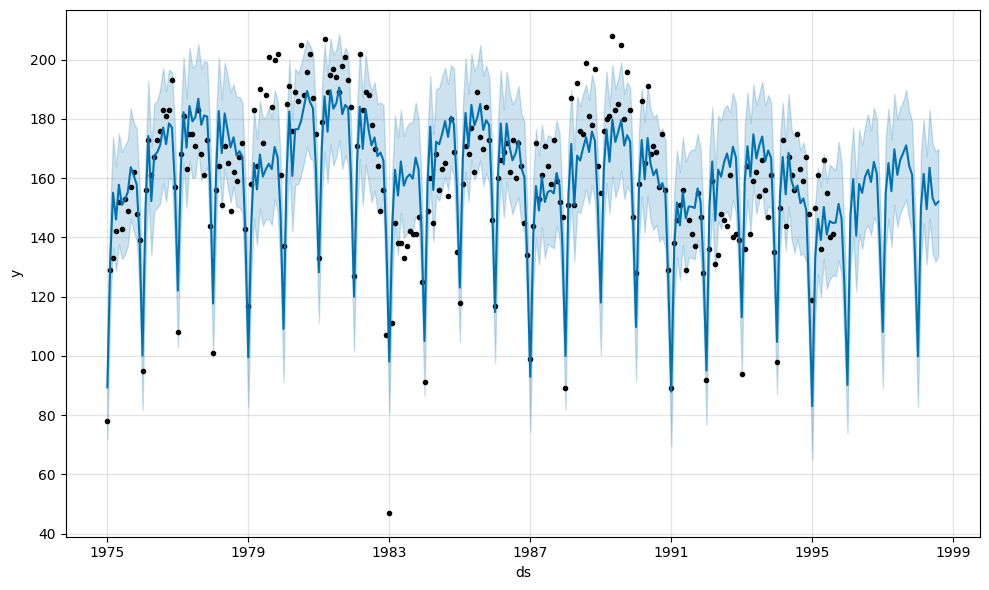

In [289]:
model.plot(forecast)
plt.show()

In [290]:
prod_ph = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]

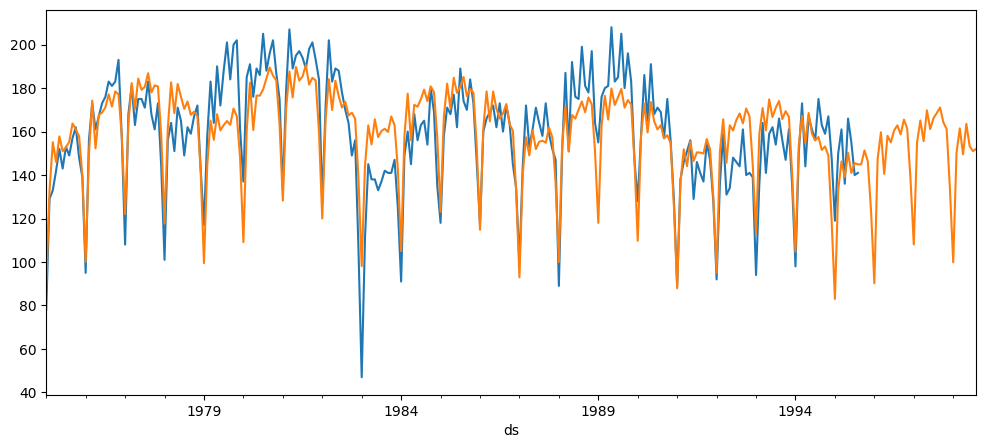

In [291]:
prod['million_units'].plot(figsize=(12,5))
prod_ph['yhat'].plot()
plt.show()

## Оценка значений метрик качества

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [292]:
print ("MAPE =", mean_absolute_percentage_error(prod['million_units'], prod_ph['yhat'][:-36]))
print ("MSE =", mean_squared_error(prod['million_units'], prod_ph['yhat'][:-36]))
print ("R\u00b2 = ", r2_score(prod['million_units'], prod_ph['yhat'][:-36]))

MAPE = 0.0768563962502041
MSE = 205.82652155314497
R² =  0.6885769075125623
